The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


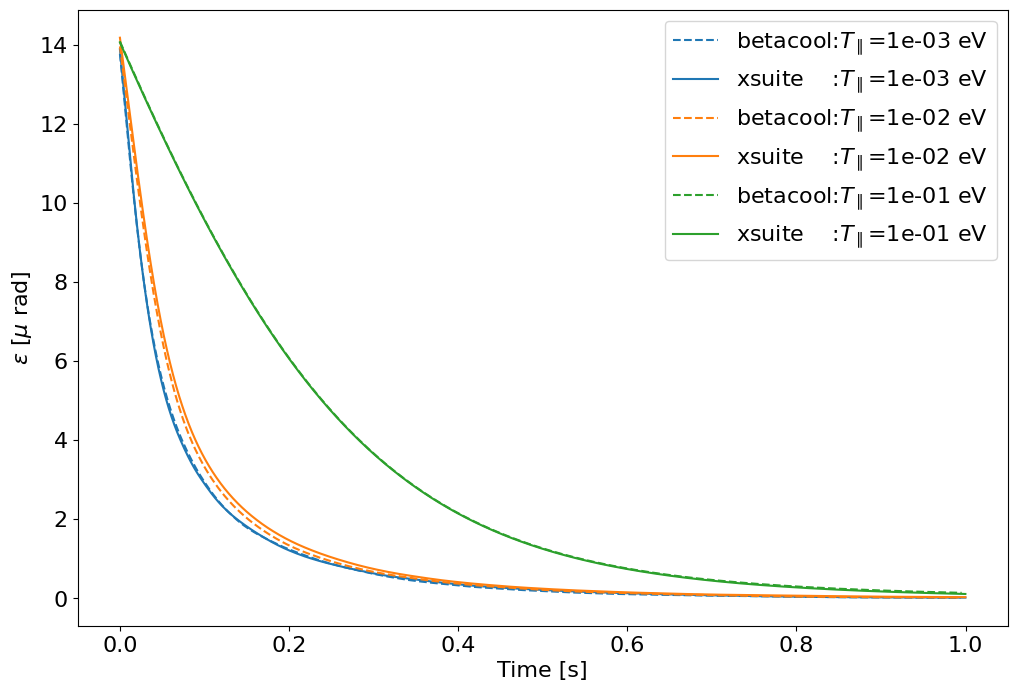

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T_l_list = [0.001,0.01,0.1] # eV

def load_data(module,T_l):
    filename = f"results/emittance_{module}_T_l={T_l}.npz"
    data = np.load(filename)
    time = data['time']
    emittance_x = data['emittance_x']
    emittance_y = data['emittance_y']
    dp_p=data['dp_p']
    return time, emittance_x,emittance_y,dp_p

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 16})

for i,T_l in enumerate(T_l_list):
    time, emittance_x,emittance_y,dp_p = load_data('betacool',T_l)
    plt.plot(time, emittance_x*1e6, label=f'betacool:$T_\parallel$={T_l:.0e} eV',color=cmap(i),linestyle='--')
    time, emittance_x,emittance_y,dp_p= load_data('xsuite',T_l)
    plt.plot(time, emittance_x*1e6, label=f'xsuite    :$T_\parallel$={T_l:.0e} eV',color=cmap(i))

plt.xlabel('Time [s]')
plt.ylabel(r'$\epsilon$ [$\mu$ rad]')
plt.legend()
plt.savefig('emittance_temperature_longitudinal.png', dpi=300)
plt.savefig('emittance_temperature_longitudinal.eps', dpi=300)
plt.show()


